# In-Group Imitation Model

In [14]:
from utils import *

In [6]:
df = pd.read_feather('data/names.feather').set_index(['year', 'name', 'gender'])

In [8]:
pct_df = df / df.groupby('year').transform(sum)

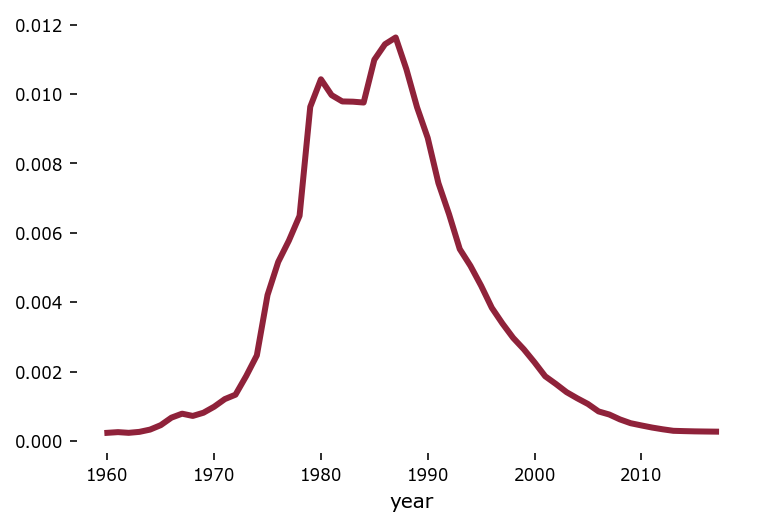

In [327]:
get_name_series('Amanda', pct_df).loc[1960:].plot()

In [218]:
# size of in-group as a percent of total population
p_in = .05

# number of births per year
N = int(1.5e6)

in_initial = .005
in_carry = .05
out_initial = 0.005
out_lag = 10
omega = 5

alpha = 2
beta = 4

N_time = 150

In [328]:


in_p = [in_initial]
out_p = [out_initial]

for i in range(N_time):
    if in_p[-1] < 0:
        dIndt = - in_p[-1]
    else:
        dIndt = alpha * in_p[-1] * (in_carry - in_p[-1] - omega*out_p[-1])
    if len(in_p) > out_lag:
        dOutdt = beta * out_p[-1] * (in_p[-out_lag] - out_p[-out_lag])
    else:
        dOutdt = 0
    in_p.append(in_p[-1] + dIndt)
    out_p.append(out_p[-1] + dOutdt)

sim = pd.DataFrame({'in': in_p, 'out': out_p})
sim['total'] = p_in * sim['in'] + (1-p_in)*sim['out']


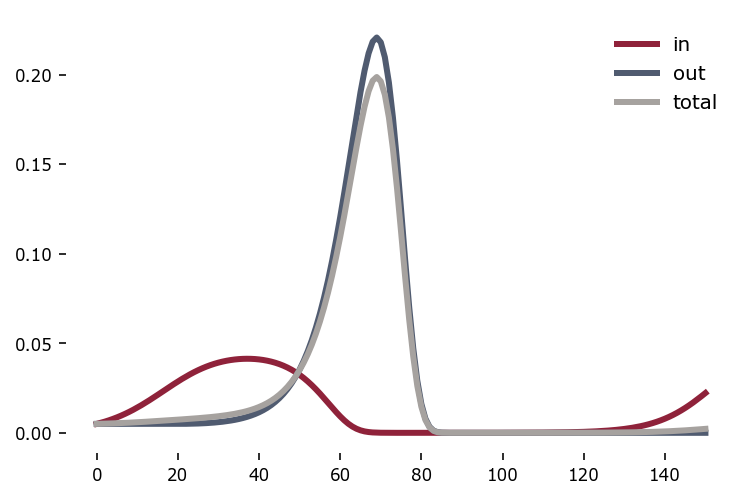

In [329]:
sim.plot()

In [338]:
# size of in-group as a percent of total population
p_in = .5

# number of births per year
N = int(1.5e6)

in_initial = .005
in_carry = .05
out_lag = 20
omega = 1

alpha = 3

N_time = 150

In [345]:
in_p = [in_initial]

for i in range(N_time):
    if len(in_p) > out_lag:
        dIndt = alpha * in_p[-1] * (in_carry - in_p[-1] - omega * in_p[-out_lag])
    else:
        dIndt = alpha * in_p[-1] * (in_carry - in_p[-1])
    in_p.append(in_p[-1] + dIndt)
    #in_p[-1] += np.random.normal(0, np.sqrt(in_p[-1] * (1-in_p[-1]) / (N*p_in)))

sim = pd.DataFrame({'in': in_p})
sim['out'] = sim['in'].shift(out_lag).fillna(0)
sim['total'] = p_in * sim['in'] + (1-p_in)*sim['out']

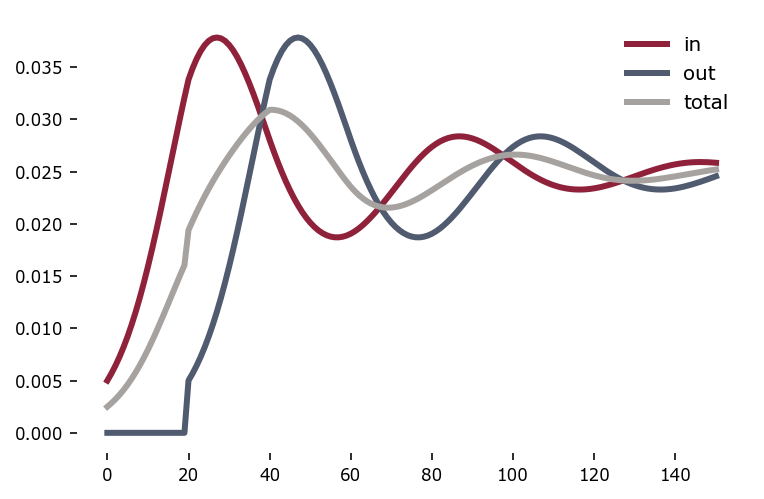

In [346]:
sim.plot()